In [2]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggl

In [4]:
!kaggle datasets download -d mohamedchahed/dog-breeds

Dataset URL: https://www.kaggle.com/datasets/mohamedchahed/dog-breeds
License(s): CC0-1.0
 98% 81.0M/82.3M [00:01<00:00, 62.0MB/s]
100% 82.3M/82.3M [00:01<00:00, 54.6MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dog-breeds.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Fetch Image count from Folders

In [6]:
count = 0
dirs = os.listdir('/content/dog-breeds/')
for dir in dirs:
    files = list(os.listdir('/content/dog-breeds/'+dir))
    print( dir +' Folder has '+ str(len(files)) + ' Images')
    count = count + len(files)
print( 'Images Folder has '+ str(count) + ' Images')

husky Folder has 71 Images
german-shepherd Folder has 76 Images
bulldog Folder has 76 Images
poodle Folder has 56 Images
rottweiler Folder has 78 Images
labrador-retriever Folder has 50 Images
beagle Folder has 83 Images
dalmatian Folder has 51 Images
Images Folder has 541 Images


In [ ]:
#Load Images into Arrays as Dataset

In [7]:
base_dir = '/content/dog-breeds/'
img_size = 180
batch = 32

In [8]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 541 files belonging to 8 classes.
Using 433 files for training.
Found 541 files belonging to 8 classes.
Using 108 files for validation.


In [9]:
dogs_names = train_ds.class_names
dogs_names

['beagle',
 'bulldog',
 'dalmatian',
 'german-shepherd',
 'husky',
 'labrador-retriever',
 'poodle',
 'rottweiler']

In [10]:
import matplotlib.pyplot as plt

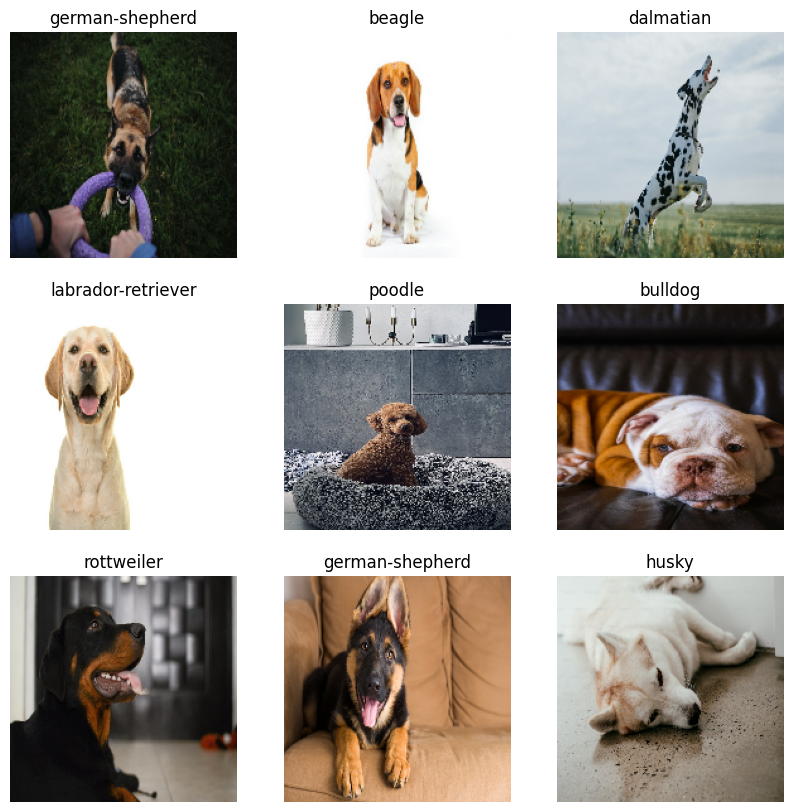

In [11]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(dogs_names[labels[i]])
        plt.axis('off')

In [12]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [13]:
#Data Augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(0.1),
    layers.RandomContrast(0.1)
])

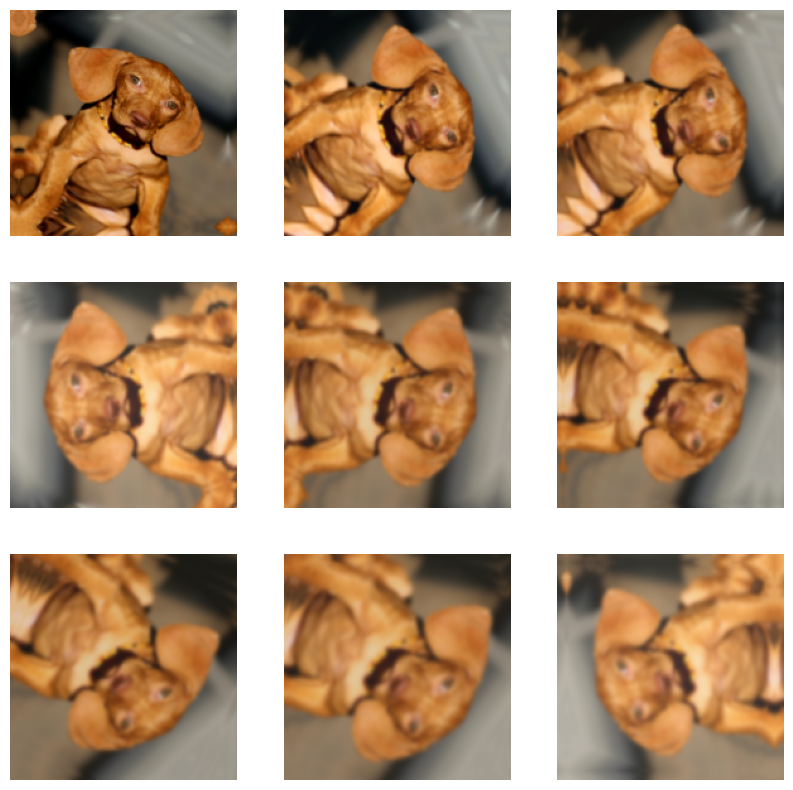

In [14]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [16]:
#Model Creation
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(len(dogs_names), activation='softmax')
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                 

In [57]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
14/14 [==============================] - 1s 50ms/step - loss: 0.2520 - accuracy: 0.9099 - val_loss: 0.9549 - val_accuracy: 0.8333
Epoch 2/15
14/14 [==============================] - 1s 45ms/step - loss: 0.1995 - accuracy: 0.9400 - val_loss: 1.4273 - val_accuracy: 0.7963
Epoch 3/15
14/14 [==============================] - 1s 46ms/step - loss: 0.1575 - accuracy: 0.9492 - val_loss: 0.9825 - val_accuracy: 0.8611
Epoch 4/15
14/14 [==============================] - 1s 45ms/step - loss: 0.1630 - accuracy: 0.9376 - val_loss: 1.0699 - val_accuracy: 0.8519
Epoch 5/15
14/14 [==============================] - 1s 45ms/step - loss: 0.2473 - accuracy: 0.9192 - val_loss: 0.8389 - val_accuracy: 0.8611
Epoch 6/15
14/14 [==============================] - 1s 45ms/step - loss: 0.1669 - accuracy: 0.9492 - val_loss: 1.2468 - val_accuracy: 0.8519
Epoch 7/15
14/14 [==============================] - 1s 45ms/step - loss: 0.1787 - accuracy: 0.9469 - val_loss: 0.8165 - val_accuracy: 0.8611
Epoch 8/15
14

In [58]:
train_loss, train_accuracy = model.evaluate(train_ds)
print("Train Loss: ", train_loss*100)
print("Train Accuracy: ", train_accuracy*100)

14/14 [==============================] - 0s 17ms/step - loss: 0.0185 - accuracy: 0.9954
Train Loss:  1.852245256304741
Train Accuracy:  99.53810572624207


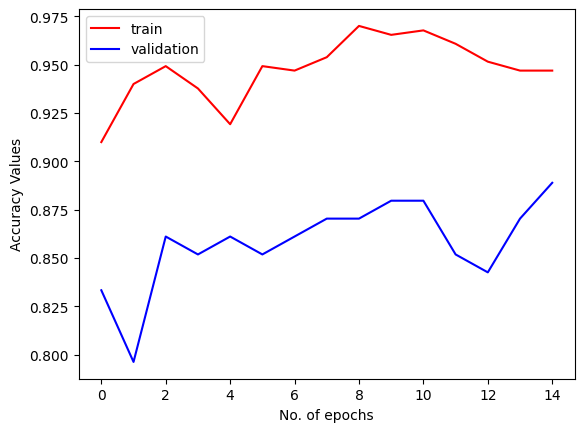

In [59]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.xlabel("No. of epochs")
plt.ylabel("Accuracy Values")
plt.legend()
plt.show()

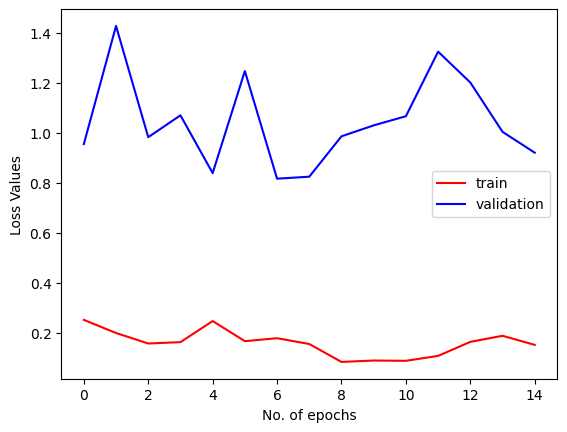

In [60]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.xlabel("No. of epochs")
plt.ylabel("Loss Values")
plt.legend()
plt.show()

In [72]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + dogs_names[np.argmax(result)]
    return outcome

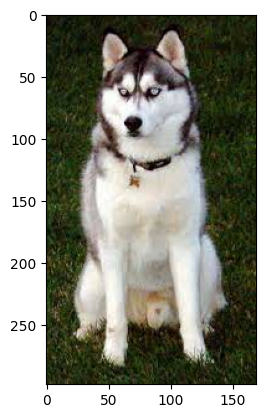

In [73]:
image_path = "/content/husky.jpeg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)
# Display the image
plt.imshow(image)
plt.show()


In [74]:
classify_images('/content/husky.jpeg')

1/1 [==============================] - 0s 18ms/step


'The Image belongs to husky'

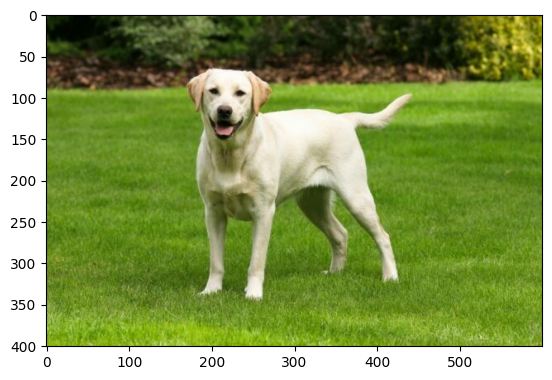

In [75]:
image_path = "/content/download1.jpg"
image = tf.io.read_file(image_path)
image = tf.image.decode_jpeg(image)
# Display the image
plt.imshow(image)
plt.show()

In [76]:
classify_images('/content/download1.jpg')

1/1 [==============================] - 0s 18ms/step


'The Image belongs to labrador-retriever'